### Ejercicio 1: Introducción a la optimización

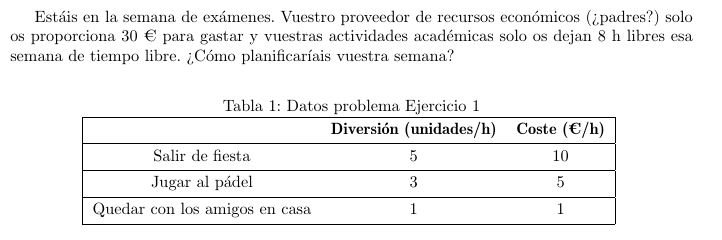

In [19]:
from IPython.display import Image 
Image(filename='img_enun/E1.png')

#### Importamos Pyomo

In [20]:
from pyomo.environ import *

#### Creamos un problema concreto, es decir, un objeto de la clase problema que ya contenga parámetros

In [21]:
model = ConcreteModel()

#### Definimos las variables como no negativas

In [22]:
model.t1 = Var(domain=NonNegativeReals, bounds=(0,8))
model.t2 = Var(domain=NonNegativeReals)
model.t3 = Var(domain=NonNegativeReals)

#### Definimos la función objetivo

In [23]:
model.profit = Objective(expr = 5*model.t1 + 3*model.t2+1*model.t3,
                         sense=maximize)

#### Definimos la restricciones

In [24]:
model.tiempolibre = Constraint(expr = model.t1 + model.t2+model.t3 <= 8)
model.dinero = Constraint(expr = 10*model.t1 + 5*model.t2+1*model.t3 <= 30)

In [25]:
results = SolverFactory('glpk').solve(model)
model.pprint()
results.write()   

3 Var Declarations
    t1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     8 : False : False : NonNegativeReals
    t2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   5.5 :  None : False : False : NonNegativeReals
    t3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   2.5 :  None : False : False : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 5*t1 + 3*t2 + t3

2 Constraint Declarations
    dinero : Size=1, Index=None, Active=True
        Key  : Lower : Body              : Upper : Active
        None :  -Inf : 10*t1 + 5*t2 + t3 :  30.0 :   True
    tiempolibre : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper : Active
        None :  -Inf : t1 + t2 + t3